# 6. Further Pandas Examples 2

This notebook will involve no direct teaching - instead we are going to attempt to re-arrange a messy and complex dataset(s). Don't worry if you are not able to complete them all within the time of the workshop - they are meant to stretch your abilities, and gain some useful Pandas and Networkx experience.

In this notebook we'll focus on some serious data-wrangling of genetic data into something that can be used for input into a machine learning model.

In [1]:
import pandas as pd
from IPython.display import Image

# Tasks

## mRNA sequences

Messenger RNA (mRNA) is a large family of RNA molecules that convey genetic information from DNA to the ribosome, where they specify the amino acid sequence of the protein products of gene expression. RNA polymerase transcribes primary transcript mRNA (known as pre-mRNA) into processed, mature mRNA. This mature mRNA is then translated into a polymer of amino acids: a protein, as summarized in the central dogma of molecular biology. Each mRNA is transcribed from a **gene**, which then undergoes translation into a sequence of *amino acids*.

### Transcription

The gene in question is copied using RNA polymerase into a strand of *messenger RNA* (mRNA). The mRNA strand is **complementary** to the DNA strand, meaning the opposing base is copied. Bases match as follows:

$$
A \to T \\
T \to A \\
C \to G \\
G \to C
$$

however in mRNA, $T$ is not used, rather $U$ standing for uracil.

### Translation

The mRNA sequence is *translated* into an amino acid sequence. **Codon Triplets** of the mRNA sequence code form a **single amino acid**, so for example $GCA \to A$, as in $A$ for the amino acid *alanine*. See the image below for the full codon table.

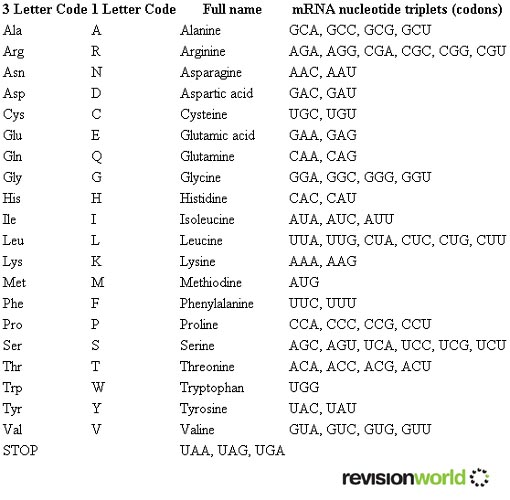

In [2]:
Image("amino copy.jpg")

Here we will be working with an mRNA-centric dataset in *gene_sequences.csv*, which contains the following:
- *Primary Accession:* Unique tag for each mRNA sequence, by NCBI
- *Description*
- *mRNA sequence*: the sequence of characters (in DNA format, i.e thyme==uracil)
- *Num Exons* : the number of exons that exist in the mRNA sequence
- *Num STS* : the number of sequence-tagged sites, these are unique regions in the entire human genome
- *Num Misc Features* : features described as miscallenous to the RNA structure
- *Num Regulatory* : regulation regions identified in the mRNA
- *Num PolyA* : polyadenylated tail regions signify regulation and play a role in mRNA maintenance
- *CDS range*: identifies the coding region
- *Num Regions* : the number of significant regions identified in the amino-acid product
- *Num Sites* : identified protein active sites in amino acid
- *Prot Mol Weight* : estimated protein molecular weight

### Task 1.

Import *gene_sequences.csv*. Use Primary-Accession as the index.

In [ ]:
# your codes here

### Task 2.

Plot the correlation matrix. The pairwise Pearson correlation between two variables $x$ and $y$ is:

$$
P(x,y)=\frac{\sum_{i=1}^{n} (x_i-\bar x)(y_i-\bar y)}{\sqrt{\sum_{i=1}^n (x_i-\bar x)^2} \sqrt{\sum_{i=1}^n(y_i-\bar y)^2}}
$$

where $\bar x$ is the mean of $x$, $\bar y$ is the mean of $y$.

Do any correlations surprise you?

In [ ]:
# your codes here

### Task 3.

Extract the **coding sequence** and **amino acid sequence** from the coding region. Remember that each coding sequence *must* begin with $AUG$ for methionine. You can do this using the mRNA sequence with the coding sequence (CDS) ranges provided. Ensure to translate each triplet to appropriate amino acid.

In [ ]:
# your codes here

### Task 4.

Let's extract extra features from our data. of particular interest would be
* The frequency of each amino acid
* The number of exons
* The average length of each exon
* The proportion of GC content in the coding region
* The prioritisation of codons

We can estimate the prioritisation of codons by calculating the **usage bias**, otherwise known as the *Codon Adaptation Index* (CAI). CAI measures the deviation of a given protein coding gene sequence with respect to a reference set of genes. This suggests that genes with a large CAI are selected for to have higher expression than those with lowly-selected codons.

$$
\text{CAI}=\left(\prod_{i=1}^L w_i\right)^\frac{1}{L}
$$

where $L$ refers to the gene length in terms of codons. For each amino acid, the weight of each of it's codons in CAI, is computed from the reference sequence set (in this case the whole dataset given), as the ratio between the observed frequency of codon $f_i$ and the frequency of the most frequent synonymous codon $f_j$ for that amino acid:

$$
w_i = \frac{f_i}{\max(f_j)}, \qquad i,j \in [\text{synonymous codons}]
$$

In [ ]:
# your codes here

### Task 5.

We extract some extra textual data about the gene from it's description label. Simplify the description by removing the species. Extract the gene name abbrievation, which transcript variant it is.

In **content analysis**, less frequent words often provide meaning/context to a sentence than repetitive, connective words such as (and, of, is, the, but) etc. Use the least-frequent word provided for each gene in it's description, once you've removed repetitive parts such as variant, gene abbrievations, connective words and random numbers, and extract this as a feature. 

In [ ]:
# your codes here